# Student Info
- s3716853
- Matthew Eletva

# Assignment Notes
- "Predict if a given patient (i.e. newborn child) will be discharged from the hospital within 3 days (class 0) or will stay in hospital beyond that - 4 days or more (class 1)”
- Binary Classification problem
    - Class 0 (3 Days)
    - Class 1 (4 or more days)

# ToDo
- Deal with Categorical data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [42]:
trainData = pd.read_csv("train_data.csv")

In [20]:
# Just being sure the data loaded fine
trainData.head(3)

,ID,HealthServiceArea,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
0,1,New York City,F,Other Race,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,1
1,2,New York City,M,Black/African American,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,1
2,3,New York City,M,Other Race,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,1


In [30]:
trainData.columns

Index(['ID', 'HealthServiceArea', 'Gender', 'Race', 'TypeOfAdmission',
       'CCSProcedureCode', 'APRSeverityOfIllnessCode', 'PaymentTypology',
       'BirthWeight', 'EmergencyDepartmentIndicator', 'AverageCostInCounty',
       'AverageChargesInCounty', 'AverageCostInFacility',
       'AverageChargesInFacility', 'AverageIncomeInZipCode', 'LengthOfStay'],
      dtype='object')

In [44]:
# modifying LengthOfStay to represent Class 0 (false) and class 1 (true)
for i in trainData.index:
    if trainData.at[i, "LengthOfStay"] < 4:
        trainData.at[i, "LengthOfStay"] = 0
    else:
        trainData.at[i, "LengthOfStay"] = 1

In [45]:
# ensuring data converted
trainData.head(3)

,ID,HealthServiceArea,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
0,1,New York City,F,Other Race,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,0
1,2,New York City,M,Black/African American,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,0
2,3,New York City,M,Other Race,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,0


### Initial Analysis

In [47]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59966 entries, 0 to 59965
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ID                            59966 non-null  int64 
 1   HealthServiceArea             59966 non-null  object
 2   Gender                        59966 non-null  object
 3   Race                          59966 non-null  object
 4   TypeOfAdmission               59966 non-null  object
 5   CCSProcedureCode              59966 non-null  int64 
 6   APRSeverityOfIllnessCode      59966 non-null  int64 
 7   PaymentTypology               59966 non-null  object
 8   BirthWeight                   59966 non-null  int64 
 9   EmergencyDepartmentIndicator  59966 non-null  object
 10  AverageCostInCounty           59966 non-null  int64 
 11  AverageChargesInCounty        59966 non-null  int64 
 12  AverageCostInFacility         59966 non-null  int64 
 13  AverageChargesIn

In [46]:
trainData.describe()

,ID,CCSProcedureCode,APRSeverityOfIllnessCode,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
count,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000
mean,29983.500000,155.404229,1.254594,3336.298903,2372.806690,7979.126922,2396.414318,7958.472668,59.811143,0.167945
std,17310.837458,89.541978,0.546207,446.244475,639.755096,3220.291347,1248.501189,3859.294711,21.470170,0.373821
min,1.000000,-1.000000,1.000000,2500.000000,712.000000,1243.000000,457.000000,1120.000000,28.000000,0.000000
25%,14992.250000,115.000000,1.000000,3000.000000,2041.000000,4620.000000,1551.000000,4438.000000,45.000000,0.000000
50%,29983.500000,220.000000,1.000000,3300.000000,2533.000000,9227.000000,1967.000000,7945.000000,55.000000,0.000000
75%,44974.750000,228.000000,1.000000,3600.000000,2785.000000,10644.000000,2895.000000,11619.000000,74.000000,0.000000
max,59966.000000,231.000000,4.000000,7500.000000,3242.000000,11381.000000,8114.000000,18466.000000,115.000000,1.000000


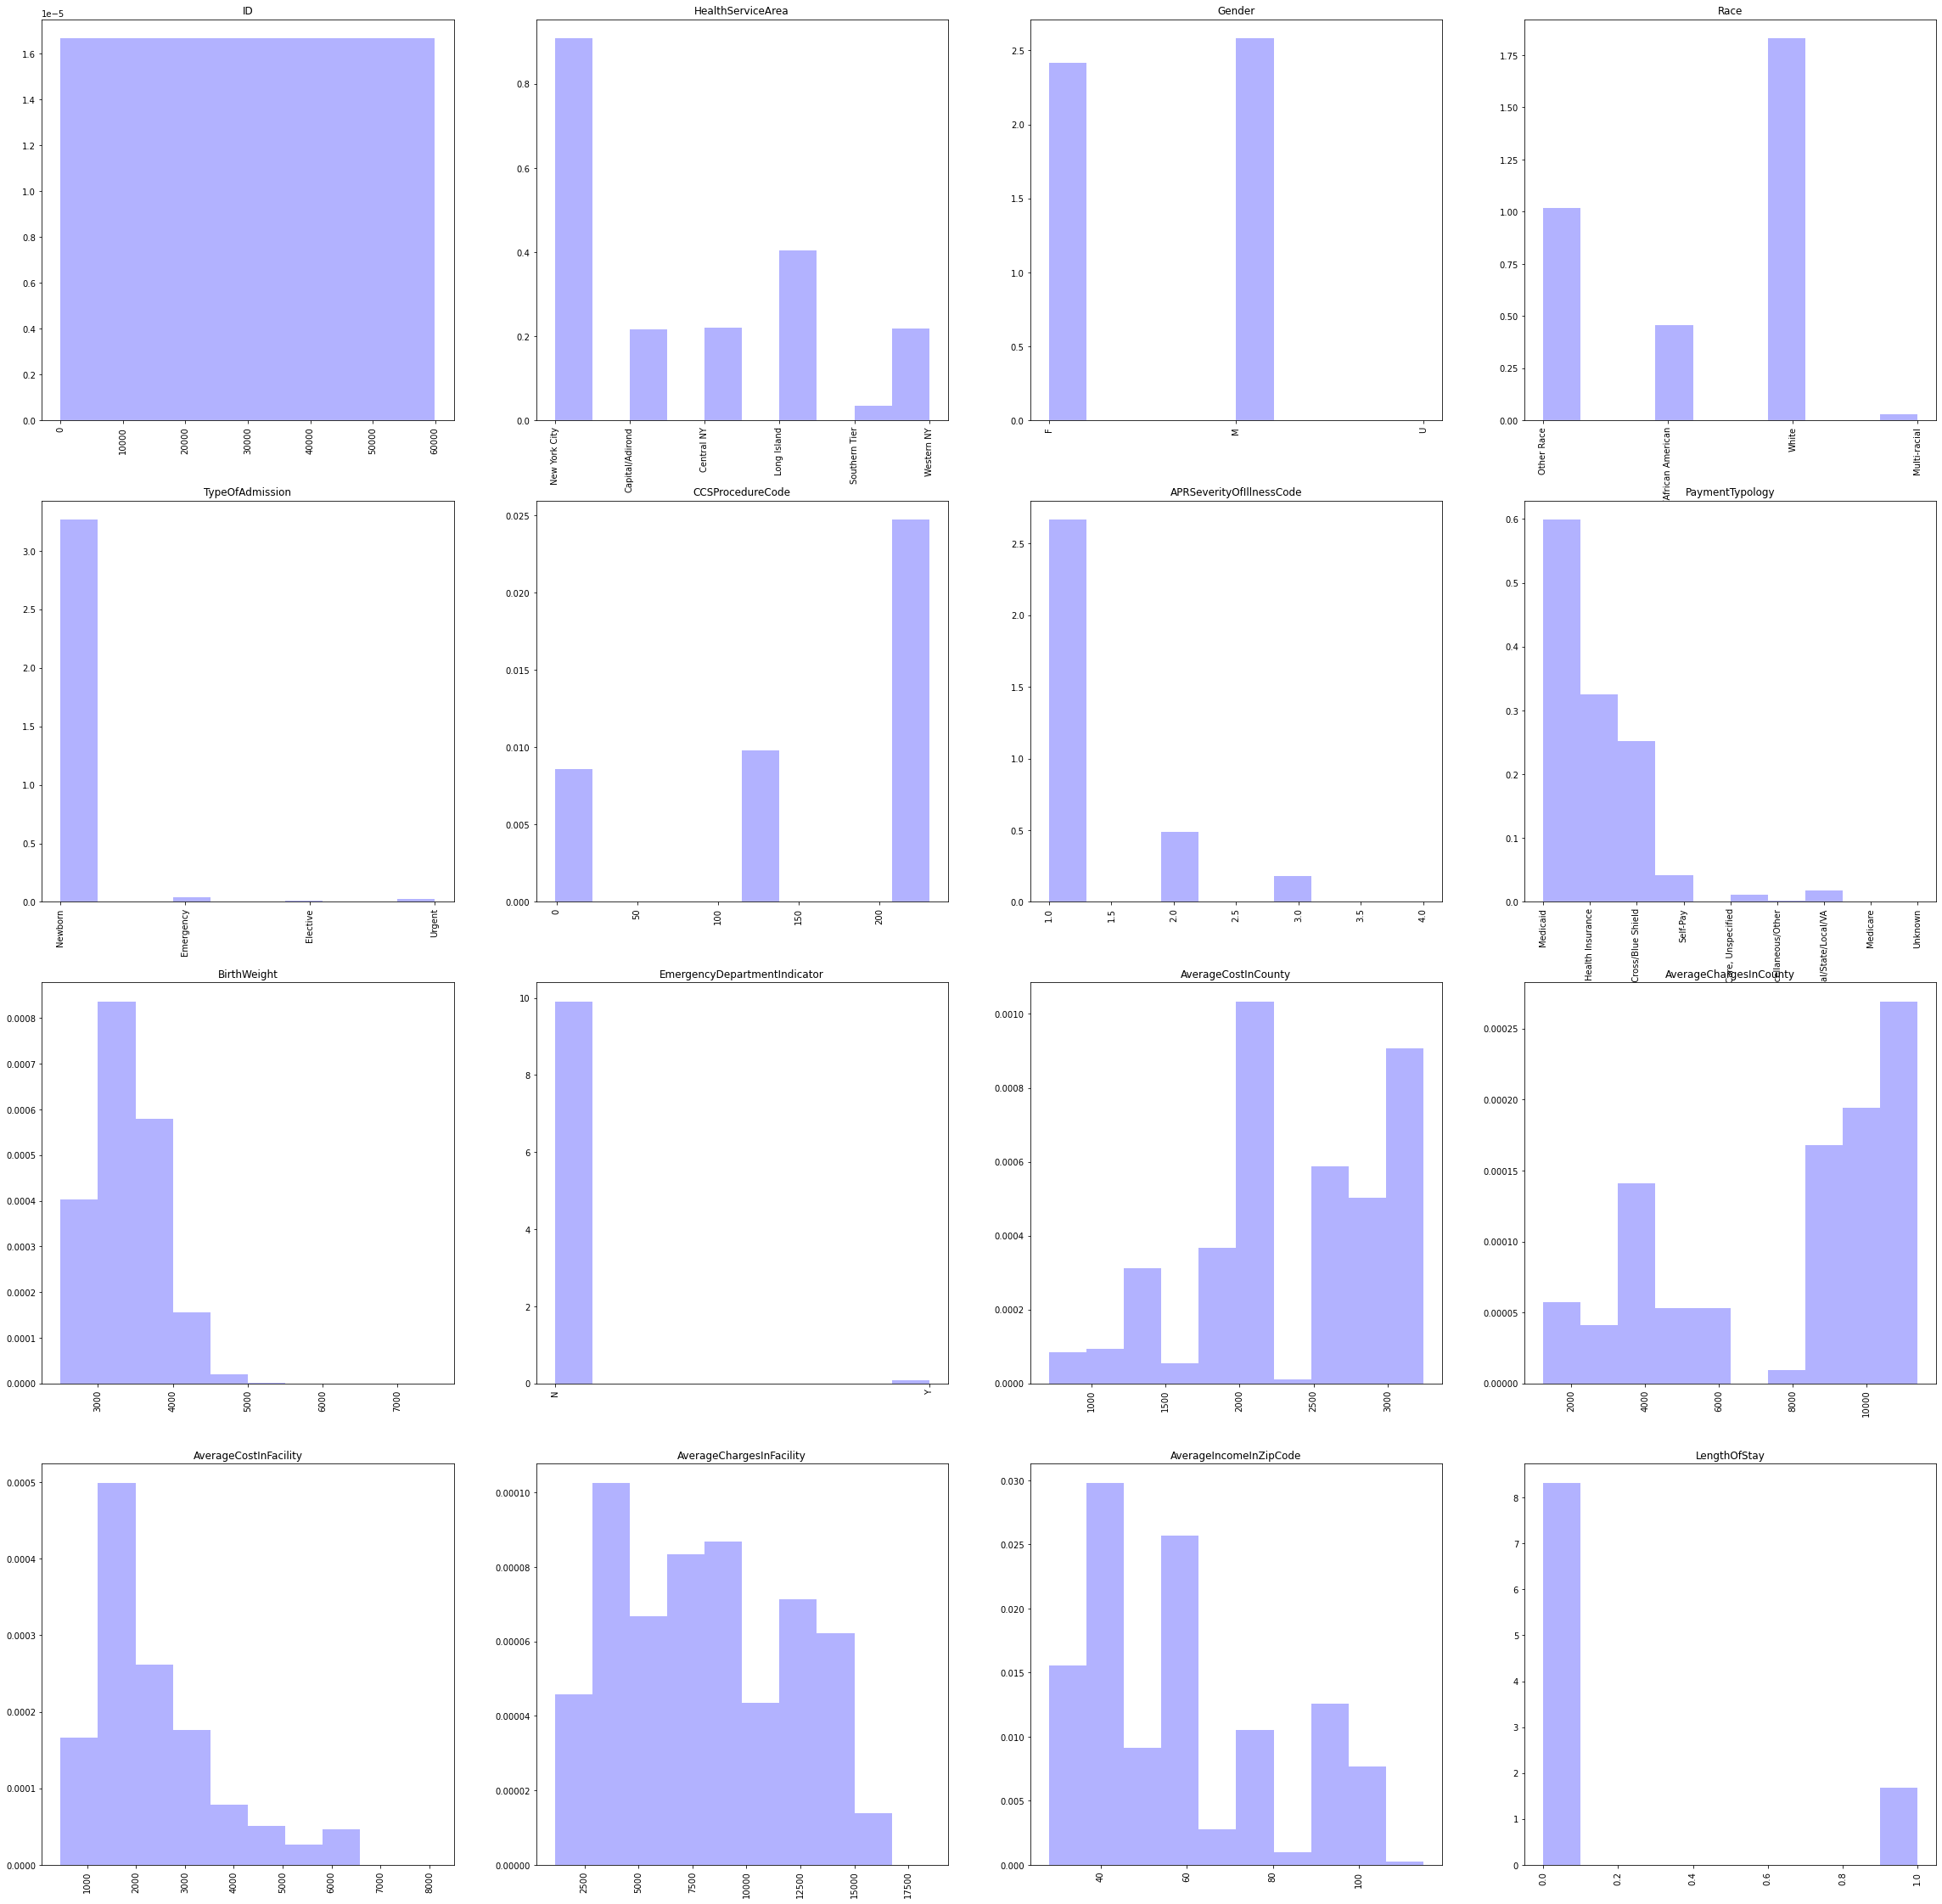

In [51]:
plt.figure(figsize=(40,40))
for i, col in enumerate(trainData.columns):
    plt.subplot(4,4,i+1)
    plt.hist(trainData[col], alpha=0.3, color='b', density=True)
    plt.title(col)
    plt.xticks(rotation="vertical")

#### Observations
- Gender
    - Few elements with Gender value of 'U'
        - Could cause issues for test data if 'U' is present there
- Race
    - 'White' is most common race by a large margin, followed by "Other Race". Probably won't be a great metric for the algorithm due to 'African American' and 'White' being the only specific ehtnicities.
        - Very few 'Multi Race' will probably lead to issues when predicting due to low data ammount to train on
        - African American will probably struggle for similar reasons as there are so few compared to White
- TypeOfAdmission
    - Vast majority of data has TypeOfAdmition as 'Newborn', other options have nearly none in comparison
        - Probabaly won't help with the algorithm all that much due to the heavy skew.
        - Could still have some effect (eg. Emergency could be more likely to be class 1).
- CCSProcedureCodes
    - Most CCSProcedureCodes are the one above 200, may be good to look into what they mean for your own analysis
- APRSeverityOfIllness 
    - Skews heavily towards 1 (Minor).
    - Few data points with value 4 (Extreme)
- PaymentTypology
    - Medicaid skew
- BirthWeight
    - Tend to be from 2500 - 4000
    - Heavy outlier (7500) present. 
- EmergencyDepartmentIndicator
    - Heavily skewed towards 'N'
- AverageCostInCounty
- AverageChargesInCounty
- AverageCostInFacility
    - Skews towards lower values
- AverageChargesInFacility
- AverageIncomeInZipCode
- LengthOfStay

#### Categorical Variables
- Ordinal
    - APRSeverityOfIllnessCode
- Nominal
    - Gender
    - Race
    - TypeOfAdmission
    - CCSProcedureCode
    - PaymentTypology
    - EmergencyDepartmentIndicator

#### Numerical Variables
- Continuous
    - BirthWeight
    - AverageCostInCounty
    - AverageChargesInCounty
    - AverageCostInFacility
    - AverageChargesInFacility
    - AverageIncomeInZipCode
- Discrete
    - NONE

#### Initial Assumptions and Comments
- Currently assuming the following variables will have the greatest impact on a patient being class 0 or 1. These are purely assumptions, nothing has been put towards proving them. Further inspection required
    - AverageIncomeInZipCode
        - Lower income may have a higher chance of complications due to issues such as having less money to go to the doctor more often.
    - BirthWeight
        - Too great or too low a birthweight could increase chance of complications, thus having a longer stay.
    - TypeOfAdmission 
        - An 'Emergency', 'Trauma', or 'Urgent' admission would probabaly need to stay in the hospital longer 